# IEEE-CIS Fraud Detection
## Can you detect fraud from customer transactions?
*Visit [kaggle](https://www.kaggle.com/c/ieee-fraud-detection) for competition details*

**Authored by Soyoung Kang**

In [3]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [5]:
trns = pd.read_csv('../ieee-fraud-detection/test_transaction.csv', engine = 'python')

In [44]:
train = pd.read_csv('../ieee-fraud-detection/transaction_ksy_pca_final.csv', engine = 'python')

In [7]:
list(trns.columns)

['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',

In [8]:
col = ['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

trns_test = trns[col]

In [23]:
trns_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0


# 0. Hour, 국가별

In [24]:
temp2 = trns_test.copy()
temp2["TransactionDT"] = temp2["TransactionDT"]/24/3600
# temp2["day"] = temp2["TransactionDT"]//1
temp2["hour"] = temp2["TransactionDT"]%1*24//1
# temp2["min"] = temp2["hour"]%1*60//1
# temp2["day2"]=temp2["day"]%7
temp2.rename(columns={"card3_ran" : "card3"}, inplace=True)

In [25]:
temp2.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,C6,C7,C8,C9,C10,C11,C12,C13,C14,hour
0,3663549,213.000278,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,0.0
1,3663550,213.000729,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,0.0
2,3663551,213.001273,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,0.0
3,3663552,213.001273,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,0.0
4,3663553,213.001354,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,0.0


In [26]:
trns_test = temp2

In [28]:
trns_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,C6,C7,C8,C9,C10,C11,C12,C13,C14,hour
0,3663549,213.000278,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,0.0
1,3663550,213.000729,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,0.0
2,3663551,213.001273,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,0.0
3,3663552,213.001273,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,0.0
4,3663553,213.001354,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,0.0


In [18]:
CH = temp2[["TransactionID", "isFraud", "card3", "hour"]].copy()
CH_group = CH.groupby(["card3", "hour", "isFraud"]).size() #card3의 시간별 사기거래를 묶음
CHF_dict = dict(CH_group) #딕셔너리화 하기
CHF_dict

card3_list = list(temp2["card3"].unique()) #card3의 유니크한 값들을 list화 함
c_fraud = []
for c in card3_list: #c는 card3(국가)
  for i in range(24): #i는 시간
    if((c, i, 0) in CHF_dict): #(국가, 시간, 사기거래 아닌것) 존재하는 지 검사
      if((c, i, 1) in CHF_dict): #(국가, 시간, 사기거래) 존재하는 지 검사, 있으면 그 국가의 그 시간대별로 사기비율을 구하고 없으면 0으로 한다
        non_fraud = int(CHF_dict[(c, i, 0)]) #사기거래 아닌 양
        fraud = int(CHF_dict[(c, i, 1)]) #사기거래인 양
        fraud_percent = 100*fraud/(non_fraud + fraud) #사기 비율 구하기
        c_fraud.append((c,i, fraud_percent)) #빈 리스트에 추가하기
      else:
        non_fraud = int(CHF_dict[(c, i, 0)]) #사기거래 아닌 양
        c_fraud.append((c,i, 0))
    else:
      pass
hour_a = pd.DataFrame(c_fraud, columns=["card3", "hour", "c_fraud"])
country_hour = pd.merge(CH, hour_a,  how='left', on=["card3", "hour"])
#country_hour.to_csv("hour_2.csv", mode='w')

KeyError: "['isFraud'] not in index"

# 1. TransactionAmt
- log scale
- 소숫점 이하 자릿수 15자리 이상 여부에 대한 boolean 컬럼 생성.
- 반복 거래(card1~6정보와 TransactionAmt, ProductCD가 일치하는 거래)에 대해 'repeated' 컬럼 생성.
    * value: 해당 카드의 전체 거래건수 대비 반복 거래 비율

## Log scale

In [29]:
trns_test['TransactionAmt_log'] = np.log(trns_test['TransactionAmt'])

## 소숫점 이하 자릿수 15자리 이상 여부에 대한 boolean 컬럼 생성.
***Add a boolean column 'TransactionAmt_residue' indicating whether TransactionAmt value exceeds 15 digits after decimal point.***

In [30]:
def num_after_point(x):
    s = str(x)
    if not '.' in s:
        return 0
    return len(s) - s.index('.') - 1 

trns['TransactionAmt_residue'] = ''

for index, row in trns_test.iterrows():
    r = num_after_point(row['TransactionAmt'])
    if r >= 15:
        trns_test.at[index, 'TransactionAmt_residue'] = 1
    else:
        trns_test.at[index, 'TransactionAmt_residue'] = 0

## 반복 거래(card1~6정보와 TransactionAmt, ProductCD가 일치하는 거래)에 대해 'repeated' 컬럼 생성.
***Add a column called 'repeated' storing ratios of repeated transactions to the total transactions per each card.***
- value: 해당 카드의 전체 거래건수 대비 반복 거래 비율

In [31]:
trns_test['card_merged'] = trns_test[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']].astype(str).apply(lambda x : ' '.join(x), axis = 1)

In [32]:
trns_test['transaction_temp'] = trns_test[['TransactionAmt', 'ProductCD', 'card_merged']].astype(str).apply(lambda x : ' '.join(x), axis = 1)

In [33]:
# {repeated_transaction : repeated times}
d = trns_test.groupby(['transaction_temp'])['TransactionID'].count().to_dict()
#d

In [34]:
trns_test['repeated'] = trns_test['transaction_temp'].map(d)

In [35]:
trns_test[['transaction_temp', 'repeated']]

,transaction_temp,repeated
0,31.95 W 10409 111.0 150.0 visa 226.0 debit,1
1,49.0 W 4272 111.0 150.0 visa 226.0 debit,37
2,171.0 W 4476 574.0 150.0 visa 226.0 debit,2
3,284.95 W 10989 360.0 150.0 visa 166.0 debit,3
4,67.95 W 18018 452.0 150.0 mastercard 117.0 debit,22
5,57.95 W 12839 321.0 150.0 visa 226.0 debit,313
6,87.0 W 16560 476.0 150.0 visa 126.0 debit,7
7,390.0 W 15066 170.0 150.0 mastercard 102.0 credit,19
8,103.95 W 2803 100.0 150.0 visa 226.0 debit,11
9,117.0 W 12544 321.0 150.0 visa 226.0 debit,374


In [36]:
trns_test.drop(columns = ['transaction_temp', 'card_merged'], inplace = True)

In [37]:
trns_test.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'hour', 'TransactionAmt_log', 'TransactionAmt_residue', 'repeated'],
      dtype='object')

# 6. card4
- imputation: random sampling
- 사실상 의미 없을 것으로 예상.

In [38]:
trns_test['card4_ran'] = trns_test['card4']
temp = (trns_test['card4'].dropna().sample(trns_test['card4'].isnull().sum()))
temp.index = trns_test[lambda x: x.card4.isnull()].index
trns_test.loc[trns_test['card4'].isnull(), 'card4_ran'] = temp

trns_test.drop('card4', axis = 1, inplace = True)

# 2. ProductCD
- dummy columns 생성.

In [39]:
trns_dum = pd.get_dummies(trns_test, columns = ['ProductCD', 'card4_ran'])

# 3. card1
- Nothing to do.

# 4. card2
- imputation: card2_na 컬럼 생성.

In [40]:
trns_dum['card2_na'] = np.where(trns_dum.card2.isnull(), 1, 0)
trns_dum.drop('card2', axis = 1, inplace = True)

# 5. card3
- 국가 정보라는 가정.
- imputation: random sampling
- card5 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.

## Imputation: Random Sampling

In [41]:
trns_dum['card3_ran'] = trns_dum['card3']
temp = (trns_dum['card3'].dropna().sample(trns_dum['card3'].isnull().sum()))
temp.index = trns_dum[lambda x: x.card3.isnull()].index
trns_dum.loc[trns_dum['card3'].isnull(), 'card3_ran'] = temp

trns_dum.drop('card3', axis = 1, inplace = True)

In [42]:
trns_dum.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card5,card6,addr1,addr2,dist1,dist2,...,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_ran_american express,card4_ran_discover,card4_ran_mastercard,card4_ran_visa,card2_na,card3_ran
0,3663549,213.000278,31.95,10409,226.0,debit,170.0,87.0,1.0,NaN,...,0,0,0,1,0,0,0,1,0,150.0
1,3663550,213.000729,49.00,4272,226.0,debit,299.0,87.0,4.0,NaN,...,0,0,0,1,0,0,0,1,0,150.0
2,3663551,213.001273,171.00,4476,226.0,debit,472.0,87.0,2635.0,NaN,...,0,0,0,1,0,0,0,1,0,150.0
3,3663552,213.001273,284.95,10989,166.0,debit,205.0,87.0,17.0,NaN,...,0,0,0,1,0,0,0,1,0,150.0
4,3663553,213.001354,67.95,18018,117.0,debit,264.0,87.0,6.0,NaN,...,0,0,0,1,0,0,1,0,0,150.0


## card3 value count 비율을 표시하는 컬럼 생성.
***Add column 'card3_count'.***

In [43]:
count = trns_dum.groupby('card3_ran')['TransactionID'].count().to_dict()
trns_dum['card3_count'] = trns_dum['card3_ran'].map(count)

## card3 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.
***Add column 'card3_fraud_ratio' indicating the ratio of fraud transactions per card3 value.***

In [46]:
train.drop('Unnamed: 0', axis = 1, inplace = True)
train.head()

,TransactionID,isFraud,TransactionDT,hour,c_fraud,TransactionAmt_log,TransactionAmt_residue,repeated,addr1_na,addr2_count,addr2_fraud_ratio,dist1_na,dist2_na,C_pca1,C_pca2,product_pca1,card_pca1,card_pca2,email_pca1,email_pca2
0,2987000,0,86400,0.0,2.088482,4.226834,0,1,0,585678,0.034418,0,1,-0.731392,0.031137,-0.788124,2.630316,1.374033,-1.316039,0.180839
1,2987001,0,86401,0.0,2.088482,3.367296,0,8,0,585678,0.034418,1,1,-0.551613,-1.052661,-0.788124,2.770431,-0.403582,-1.316039,0.180839
2,2987002,0,86469,0.0,2.088482,4.077537,0,87,0,585678,0.034418,0,1,-0.867673,-0.152066,-0.788124,-1.133976,-0.466237,0.841828,-0.532078
3,2987003,0,86499,0.0,2.088482,3.912023,0,17,0,585678,0.034418,1,1,-0.369015,0.427003,-0.788124,0.501258,-2.541735,1.522186,1.495716
4,2987004,0,86506,0.0,2.088482,3.912023,0,2,0,585678,0.034418,1,1,-0.219520,-1.193401,2.193429,2.768271,-0.398485,-1.316039,0.180839


In [17]:
d = train.groupby(['card3'])['TransactionID'].count().to_dict()

# 7. card5
- imputation: random sampling
- card5 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.

## Imputation: Random Sampling

In [18]:
trns_dum['card5_ran'] = trns_dum['card5']
temp = (trns_dum['card5'].dropna().sample(trns_dum['card5'].isnull().sum()))
temp.index = trns_dum[lambda x: x.card5.isnull()].index
trns_dum.loc[trns_dum['card5'].isnull(), 'card5_ran'] = temp

trns_dum.drop('card5', axis = 1, inplace = True)

## card5 value count 비율을 표시하는 컬럼 생성.
***Add column 'card5_count'.***

In [19]:
count = trns_dum.groupby('card5_ran')['TransactionID'].count().to_dict()
trns_dum['card5_count'] = trns_dum['card5_ran'].map(count)

## card5 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.
***Add column 'card5_fraud_ratio' indicating the ratio of fraud transactions per card5 value.***

In [20]:
s0 = trns_dum.groupby(['card5_ran'])['isFraud'].count()
s1 = trns_dum.groupby(['card5_ran'])['isFraud'].sum()
s2 = trns_dum.groupby(['card5_ran'])['isFraud'].sum() / trns_dum.groupby(['card5_ran'])['isFraud'].count()

df = pd.DataFrame(columns = ['transaction_num','fraud_num', 'fraud_ratio'])
df['transaction_num'] = s0
df['fraud_num'] = s1
df['fraud_ratio'] = s2

df_dic = df['fraud_ratio'].to_dict()
trns_dum['card5_fraud_ratio'] = trns_dum['card5_ran'].map(df_dic)

# 8. card6
- imputation: random sampling
- card6 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.

## Imputation: Random Sampling

In [21]:
trns_dum['card6_ran'] = trns_dum['card6']
temp = (trns_dum['card6'].dropna().sample(trns_dum['card6'].isnull().sum()))
temp.index = trns_dum[lambda x: x.card6.isnull()].index
trns_dum.loc[trns_dum['card6'].isnull(), 'card6_ran'] = temp

trns_dum.drop('card6', axis = 1, inplace = True)

## card6 value count 비율을 표시하는 컬럼 생성.
***Add column 'card6_count'.***

In [22]:
count = trns_dum.groupby('card6_ran')['TransactionID'].count().to_dict()
trns_dum['card6_count'] = trns_dum['card6_ran'].map(count)

## card6 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.
***Add column 'card6_fraud_ratio' indicating the ratio of fraud transactions per card6 value.***

In [23]:
s0 = trns_dum.groupby(['card6_ran'])['isFraud'].count()
s1 = trns_dum.groupby(['card6_ran'])['isFraud'].sum()
s2 = trns_dum.groupby(['card6_ran'])['isFraud'].sum() / trns_dum.groupby(['card6_ran'])['isFraud'].count()

df = pd.DataFrame(columns = ['transaction_num','fraud_num', 'fraud_ratio'])
df['transaction_num'] = s0
df['fraud_num'] = s1
df['fraud_ratio'] = s2

df_dic = df['fraud_ratio'].to_dict()
trns_dum['card6_fraud_ratio'] = trns_dum['card6_ran'].map(df_dic)

In [24]:
# drop card6_ran
#trns_dum.drop('card6_ran', axis = 1, inplace = True)

# 9. addr1
- 지역 정보라는 가정.
- imputation: addr1_na 컬럼 생성. (nan이 오직 사기거래서만 나타남)

In [25]:
trns_dum['addr1_na'] = np.where(trns_dum.addr1.isnull(), 1, 0)
trns_dum.drop('addr1', axis = 1, inplace = True)

# 10. addr2
- 국가 정보라는 가정.
- imputation: random sampling
- addr2 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.

## Imputation: Random Sampling

In [26]:
trns_dum['addr2_ran'] = trns_dum['addr2']
temp = (trns_dum['addr2'].dropna().sample(trns_dum['addr2'].isnull().sum()))
temp.index = trns_dum[lambda x: x.addr2.isnull()].index
trns_dum.loc[trns_dum['addr2'].isnull(), 'addr2_ran'] = temp

trns_dum.drop('addr2', axis = 1, inplace = True)

## addr2 value count 비율을 표시하는 컬럼 생성.
***Add column 'addr2_count'.***

In [27]:
count = trns_dum.groupby('addr2_ran')['TransactionID'].count().to_dict()
trns_dum['addr2_count'] = trns_dum['addr2_ran'].map(count)

## addr2 value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성.
***Add column 'addr2_fraud_ratio' indicating the ratio of fraud transactions per addr2 value.***

In [28]:
s0 = trns_dum.groupby(['addr2_ran'])['isFraud'].count()
s1 = trns_dum.groupby(['addr2_ran'])['isFraud'].sum()
s2 = trns_dum.groupby(['addr2_ran'])['isFraud'].sum() / trns_dum.groupby(['addr2_ran'])['isFraud'].count()

df = pd.DataFrame(columns = ['transaction_num','fraud_num', 'fraud_ratio'])
df['transaction_num'] = s0
df['fraud_num'] = s1
df['fraud_ratio'] = s2

df_dic = df['fraud_ratio'].to_dict()
trns_dum['addr2_fraud_ratio'] = trns_dum['addr2_ran'].map(df_dic)

# 11. dist1
- imputation: dist1_na 컬럼 생성.

In [29]:
trns_dum['dist1_na'] = np.where(trns_dum.dist1.isnull(), 1, 0)
trns_dum.drop('dist1', axis = 1, inplace = True)

# 12. dist2
- imputation: dist2_na 컬럼 생성.

In [30]:
trns_dum['dist2_na'] = np.where(trns_dum.dist2.isnull(), 1, 0)
trns_dum.drop('dist2', axis = 1, inplace = True)

# 13. P_emaildomain, R_emaildomain
- merge

### Merge

In [31]:
trns_dum['email_merged'] = list(map(lambda x, y : x if pd.notnull(x) else y, trns_dum['P_emaildomain'], trns_train['R_emaildomain']))
trns_dum['email_merged']

0                 NaN
1           gmail.com
2         outlook.com
3           yahoo.com
4           gmail.com
             ...     
590535            NaN
590536      gmail.com
590537      gmail.com
590538        aol.com
590539      gmail.com
Name: email_merged, Length: 590540, dtype: object

In [110]:
trns_dum['email_merged'].isnull().sum()

83392

## Imputation: Random Sampling

In [32]:
trns_dum['email_merged_ran'] = trns_dum['email_merged']
temp = (trns_dum['email_merged'].dropna().sample(trns_dum['email_merged'].isnull().sum()))
temp.index = trns_dum[lambda x: x.email_merged.isnull()].index
trns_dum.loc[trns_dum['email_merged'].isnull(), 'email_merged_ran'] = temp

trns_dum.drop('email_merged', axis = 1, inplace = True)

In [33]:
trns_dum_email = pd.get_dummies(data = trns_dum, columns = ['email_merged_ran'])

In [27]:
#trns_dum.drop(columns = ['P_emaildomain', 'R_emaildomain'], inplace = True)

In [34]:
trns_dum = trns_dum_email

# 14. C1~14
- 각 컬럼에 대해, value별 전체 거래 대비 사기거래 비율을 표시하는 컬럼 생성. 기존 C1~14 버림.

In [35]:
def C_fraud_ratio(i):
    s0 = trns_dum.groupby(['C' + str(i)])['isFraud'].count()
    s1 = trns_dum.groupby(['C' + str(i)])['isFraud'].sum()
    s2 = trns_dum.groupby(['C' + str(i)])['isFraud'].sum() / trns_dum.groupby(['C' + str(i)])['isFraud'].count()

    df = pd.DataFrame(columns = ['transaction_num','fraud_num', 'fraud_ratio'])
    df['transaction_num'] = s0
    df['fraud_num'] = s1
    df['fraud_ratio'] = s2

    df_dic = df['fraud_ratio'].to_dict()
    trns_dum['fraud_ratio_C' + str(i)] = trns_dum['C' + str(i)].map(df_dic)

    trns_dum.drop('C' + str(i), axis = 1, inplace = True)

In [36]:
for i in range(1, 15):
    C_fraud_ratio(i)

# Midpoint Export

In [38]:
trns_dum.to_csv('transaction_ksy.csv', encoding = 'utf8')

# 15. PCA on C1~C14_fraud_ratio 

In [39]:
c = trns_dum.iloc[:, -14:]

In [40]:
c = StandardScaler().fit_transform(c)

In [41]:
pca = PCA(n_components = 2)
pca.fit(c)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
pca.components_

array([[ 0.27048847,  0.30636552, -0.0057491 ,  0.37306586,  0.06239382,
         0.24150599,  0.3631165 ,  0.36660684,  0.1466856 ,  0.34782179,
         0.26706079,  0.35992329,  0.08723596,  0.11966472],
       [ 0.35135123,  0.26553978,  0.08140955, -0.12888128, -0.43111538,
         0.31028795, -0.08359818, -0.13592902, -0.41797193, -0.16324875,
         0.3590112 , -0.05649055, -0.30349282, -0.22284478]])

In [43]:
c_pca = pca.transform(c)
print("original shape:   ", c.shape)
print("transformed shape:", c_pca.shape)

original shape:    (590540, 14)
transformed shape: (590540, 2)


In [44]:
type(c_pca)

numpy.ndarray

In [45]:
c_pca_df = pd.DataFrame(data = c_pca, columns = ['C_pca1', 'C_pca2'])

c_pca_df.head(10)

,C_pca1,C_pca2
0,-0.731392,0.031137
1,-0.551613,-1.052661
2,-0.867673,-0.152066
3,-0.369015,0.427003
4,-0.219520,-1.193401
5,-0.867673,-0.152066
6,-0.867673,-0.152066
7,-0.551613,-1.052661
8,-0.219520,-1.193401
9,-0.565330,0.035693


## Merge PCA columns to dataframe

In [46]:
trns_dum['tmp'] = range(trns_dum.shape[0])
trns_dum.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,P_emaildomain,R_emaildomain,D1,D2,D3,...,fraud_ratio_C6,fraud_ratio_C7,fraud_ratio_C8,fraud_ratio_C9,fraud_ratio_C10,fraud_ratio_C11,fraud_ratio_C12,fraud_ratio_C13,fraud_ratio_C14,tmp
0,2987000,0,86400,68.5,13926,NaN,NaN,14.0,NaN,13.0,...,0.027764,0.024376,0.020899,0.019062,0.021273,0.040378,0.022897,0.028304,0.026859,0
1,2987001,0,86401,29.0,2755,gmail.com,NaN,0.0,NaN,NaN,...,0.027764,0.024376,0.020899,0.066683,0.021273,0.025346,0.022897,0.028304,0.026859,1
2,2987002,0,86469,59.0,4663,outlook.com,NaN,0.0,NaN,NaN,...,0.027764,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.028304,0.026859,2
3,2987003,0,86499,50.0,18132,yahoo.com,NaN,112.0,112.0,0.0,...,0.053300,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.026178,0.026859,3
4,2987004,0,86506,50.0,4497,gmail.com,NaN,0.0,NaN,NaN,...,0.027764,0.024376,0.044393,0.066683,0.046303,0.025346,0.022897,0.028304,0.026859,4


In [47]:
c_pca_df['tmp'] = range(c_pca_df.shape[0])
c_pca_df.head()

,C_pca1,C_pca2,tmp
0,-0.731392,0.031137,0
1,-0.551613,-1.052661,1
2,-0.867673,-0.152066,2
3,-0.369015,0.427003,3
4,-0.219520,-1.193401,4


In [48]:
DF = trns_dum.merge(c_pca_df, on=['tmp'])
DF.drop('tmp', axis=1, inplace = True)
DF.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,P_emaildomain,R_emaildomain,D1,D2,D3,...,fraud_ratio_C7,fraud_ratio_C8,fraud_ratio_C9,fraud_ratio_C10,fraud_ratio_C11,fraud_ratio_C12,fraud_ratio_C13,fraud_ratio_C14,C_pca1,C_pca2
0,2987000,0,86400,68.5,13926,NaN,NaN,14.0,NaN,13.0,...,0.024376,0.020899,0.019062,0.021273,0.040378,0.022897,0.028304,0.026859,-0.731392,0.031137
1,2987001,0,86401,29.0,2755,gmail.com,NaN,0.0,NaN,NaN,...,0.024376,0.020899,0.066683,0.021273,0.025346,0.022897,0.028304,0.026859,-0.551613,-1.052661
2,2987002,0,86469,59.0,4663,outlook.com,NaN,0.0,NaN,NaN,...,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.028304,0.026859,-0.867673,-0.152066
3,2987003,0,86499,50.0,18132,yahoo.com,NaN,112.0,112.0,0.0,...,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.026178,0.026859,-0.369015,0.427003
4,2987004,0,86506,50.0,4497,gmail.com,NaN,0.0,NaN,NaN,...,0.024376,0.044393,0.066683,0.046303,0.025346,0.022897,0.028304,0.026859,-0.219520,-1.193401
5,2987005,0,86510,49.0,5937,gmail.com,NaN,0.0,NaN,NaN,...,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.028304,0.026859,-0.867673,-0.152066
6,2987006,0,86522,159.0,12308,yahoo.com,NaN,0.0,NaN,NaN,...,0.024376,0.020899,0.019062,0.021273,0.025346,0.022897,0.028304,0.026859,-0.867673,-0.152066
7,2987007,0,86529,422.5,12695,mail.com,NaN,0.0,NaN,NaN,...,0.024376,0.020899,0.066683,0.021273,0.025346,0.022897,0.028304,0.026859,-0.551613,-1.052661
8,2987008,0,86535,15.0,2803,anonymous.com,NaN,0.0,NaN,NaN,...,0.024376,0.044393,0.066683,0.046303,0.025346,0.022897,0.028304,0.026859,-0.219520,-1.193401
9,2987009,0,86536,117.0,17399,yahoo.com,NaN,61.0,61.0,30.0,...,0.024376,0.020899,0.026211,0.021273,0.025346,0.022897,0.025705,0.027663,-0.565330,0.035693


In [49]:
list(DF.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'P_emaildomain',
 'R_emaildomain',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 '

# Check and Trim

In [50]:
col = ['TransactionID',
 'isFraud',
 'TransactionDT',
 'card1','TransactionAmt_log',
 'TransactionAmt_residue',
 'repeated',
 'ProductCD_C',
 'ProductCD_H',
 'ProductCD_R',
 'ProductCD_S',
 'ProductCD_W',
 'card4_ran_american express',
 'card4_ran_discover',
 'card4_ran_mastercard',
 'card4_ran_visa',
 'card2_na',
 'card3_count',
 'card3_fraud_ratio',
 'card5_count',
 'card5_fraud_ratio',
 'card6_count',
 'card6_fraud_ratio',
 'addr1_na',
 'addr2_count',
 'addr2_fraud_ratio',
 'dist1_na',
 'dist2_na',
 'email_merged_ran_aim.com',
 'email_merged_ran_anonymous.com',
 'email_merged_ran_aol.com',
 'email_merged_ran_att.net',
 'email_merged_ran_bellsouth.net',
 'email_merged_ran_cableone.net',
 'email_merged_ran_centurylink.net',
 'email_merged_ran_cfl.rr.com',
 'email_merged_ran_charter.net',
 'email_merged_ran_comcast.net',
 'email_merged_ran_cox.net',
 'email_merged_ran_earthlink.net',
 'email_merged_ran_embarqmail.com',
 'email_merged_ran_frontier.com',
 'email_merged_ran_frontiernet.net',
 'email_merged_ran_gmail',
 'email_merged_ran_gmail.com',
 'email_merged_ran_gmx.de',
 'email_merged_ran_hotmail.co.uk',
 'email_merged_ran_hotmail.com',
 'email_merged_ran_hotmail.de',
 'email_merged_ran_hotmail.es',
 'email_merged_ran_hotmail.fr',
 'email_merged_ran_icloud.com',
 'email_merged_ran_juno.com',
 'email_merged_ran_live.com',
 'email_merged_ran_live.com.mx',
 'email_merged_ran_live.fr',
 'email_merged_ran_mac.com',
 'email_merged_ran_mail.com',
 'email_merged_ran_me.com',
 'email_merged_ran_msn.com',
 'email_merged_ran_netzero.com',
 'email_merged_ran_netzero.net',
 'email_merged_ran_optonline.net',
 'email_merged_ran_outlook.com',
 'email_merged_ran_outlook.es',
 'email_merged_ran_prodigy.net.mx',
 'email_merged_ran_protonmail.com',
 'email_merged_ran_ptd.net',
 'email_merged_ran_q.com',
 'email_merged_ran_roadrunner.com',
 'email_merged_ran_rocketmail.com',
 'email_merged_ran_sbcglobal.net',
 'email_merged_ran_sc.rr.com',
 'email_merged_ran_scranton.edu',
 'email_merged_ran_servicios-ta.com',
 'email_merged_ran_suddenlink.net',
 'email_merged_ran_twc.com',
 'email_merged_ran_verizon.net',
 'email_merged_ran_web.de',
 'email_merged_ran_windstream.net',
 'email_merged_ran_yahoo.co.jp',
 'email_merged_ran_yahoo.co.uk',
 'email_merged_ran_yahoo.com',
 'email_merged_ran_yahoo.com.mx',
 'email_merged_ran_yahoo.de',
 'email_merged_ran_yahoo.es',
 'email_merged_ran_yahoo.fr',
 'email_merged_ran_ymail.com',
 'C_pca1',
 'C_pca2']

trns_preproc = DF[col]

In [51]:
trns_preproc.head(10)

,TransactionID,isFraud,TransactionDT,card1,TransactionAmt_log,TransactionAmt_residue,repeated,ProductCD_C,ProductCD_H,ProductCD_R,...,email_merged_ran_yahoo.co.jp,email_merged_ran_yahoo.co.uk,email_merged_ran_yahoo.com,email_merged_ran_yahoo.com.mx,email_merged_ran_yahoo.de,email_merged_ran_yahoo.es,email_merged_ran_yahoo.fr,email_merged_ran_ymail.com,C_pca1,C_pca2
0,2987000,0,86400,13926,4.226834,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.731392,0.031137
1,2987001,0,86401,2755,3.367296,0,8,0,0,0,...,0,0,0,0,0,0,0,0,-0.551613,-1.052661
2,2987002,0,86469,4663,4.077537,0,87,0,0,0,...,0,0,0,0,0,0,0,0,-0.867673,-0.152066
3,2987003,0,86499,18132,3.912023,0,17,0,0,0,...,0,0,1,0,0,0,0,0,-0.369015,0.427003
4,2987004,0,86506,4497,3.912023,0,2,0,1,0,...,0,0,0,0,0,0,0,0,-0.219520,-1.193401
5,2987005,0,86510,5937,3.891820,0,3,0,0,0,...,0,0,0,0,0,0,0,0,-0.867673,-0.152066
6,2987006,0,86522,12308,5.068904,0,1,0,0,0,...,0,0,1,0,0,0,0,0,-0.867673,-0.152066
7,2987007,0,86529,12695,6.046189,0,5,0,0,0,...,0,0,0,0,0,0,0,0,-0.551613,-1.052661
8,2987008,0,86535,2803,2.708050,0,13,0,1,0,...,0,0,0,0,0,0,0,0,-0.219520,-1.193401
9,2987009,0,86536,17399,4.762174,0,99,0,0,0,...,0,0,1,0,0,0,0,0,-0.565330,0.035693


In [125]:
#dum = pd.get_dummies(data = trns_preproc, columns = ['card3_ran', 'addr2_ran', 'card5_ran'])

# PCA

## ProductCD

In [52]:
products = list(trns_preproc.filter(regex = '^ProductCD_', axis = 1).columns)
p = trns_preproc[products]
p = StandardScaler().fit_transform(p)

pca = PCA(n_components = 1)
pca.fit(p)
_pca = pca.transform(p)
_pca_df = pd.DataFrame(data = _pca, columns = ['product_pca1'])

trns_preproc.drop(columns = products, inplace = True)

trns_preproc['tmp'] = range(trns_preproc.shape[0])
_pca_df['tmp'] = range(_pca_df.shape[0])

trns_ = trns_preproc.merge(_pca_df, on=['tmp'])
trns_.drop('tmp', axis=1, inplace = True)

## card

In [53]:
lst = list(trns_.filter(regex = '^card', axis = 1).columns)
p = trns_[lst]
p = StandardScaler().fit_transform(p)

pca = PCA(n_components = 2)
pca.fit(p)
_pca = pca.transform(p)
_pca_df = pd.DataFrame(data = _pca, columns = ['card_pca1', 'card_pca2'])

trns_.drop(columns = lst, inplace = True)

trns_['tmp'] = range(trns_.shape[0])
_pca_df['tmp'] = range(_pca_df.shape[0])

trns_1 = trns_.merge(_pca_df, on=['tmp'])
trns_1.drop('tmp', axis=1, inplace = True)

trns_ = trns_1

## email_merged_ran

In [54]:
lst = list(trns_.filter(regex = '^email_merged_ran_', axis = 1).columns)
p = trns_[lst]
p = StandardScaler().fit_transform(p)

pca = PCA(n_components = 2)
pca.fit(p)
_pca = pca.transform(p)
_pca_df = pd.DataFrame(data = _pca, columns = ['email_pca1', 'email_pca2'])

trns_.drop(columns = lst, inplace = True)

trns_['tmp'] = range(trns_.shape[0])
_pca_df['tmp'] = range(_pca_df.shape[0])

trns_1 = trns_.merge(_pca_df, on=['tmp'])
trns_1.drop('tmp', axis=1, inplace = True)

trns_ = trns_1

In [55]:
list(trns_.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt_log',
 'TransactionAmt_residue',
 'repeated',
 'addr1_na',
 'addr2_count',
 'addr2_fraud_ratio',
 'dist1_na',
 'dist2_na',
 'C_pca1',
 'C_pca2',
 'product_pca1',
 'card_pca1',
 'card_pca2',
 'email_pca1',
 'email_pca2']

# Export

In [56]:
trns_.to_csv('transaction_ksy_pca.csv', encoding = 'utf8')

# 동일 반복거래 중 일부는 사기거래, 일부는 비사기거래

In [51]:
trns_train.repeated.nunique()

281

In [17]:
t = pd.DataFrame(trns_train[['isFraud', 'repeated']], columns = ['isFraud', 'repeated'])
t1 = t.sort_values(by = 'repeated', ascending = False).head(10110)

In [18]:
t1.groupby('repeated')['repeated'].count()

repeated
518      518
531      531
553      553
567      567
572      572
579      579
592      592
613      613
617      617
624      624
665      665
785      785
875      875
952      952
1067    1067
Name: repeated, dtype: int64

In [21]:
t1[t1.isFraud == 1].head()

,isFraud,repeated
241687,1,1067
152875,1,1067
376370,1,1067
57221,1,1067
491220,1,1067


In [22]:
f = t1[t1.isFraud == 1]
n = t1[t1.isFraud == 0]

In [27]:
f.repeated.unique()

array([1067,  952,  875,  785,  665,  624,  617,  592,  579,  572,  567,
        531,  518])

In [29]:
f.groupby('repeated')['repeated'].count()

repeated
518      1
531     13
567     18
572     14
579     13
592      6
617      5
624      6
665      5
785     10
875      5
952     51
1067    34
Name: repeated, dtype: int64

In [28]:
n.repeated.unique()

array([1067,  952,  875,  785,  665,  624,  617,  613,  592,  579,  572,
        567,  553,  531,  518])

In [30]:
n.groupby('repeated')['repeated'].count()

repeated
518      517
531      518
553      553
567      549
572      558
579      566
592      586
613      613
617      612
624      618
665      660
785      775
875      870
952      901
1067    1033
Name: repeated, dtype: int64

<Figure size 1080x576 with 0 Axes>

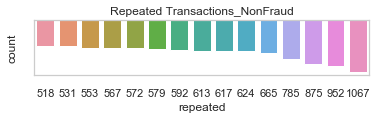

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

#plt.rcParams["figure.figsize"] = (20,10)
plt.figure(figsize=(15,8))

# mpl.rc('font', family='nanumgothic')
# mpl.rc('axes', unicode_minus=False)

current_palette = sns.color_palette()
sns.palplot(sns.color_palette("Blues"))

sns.countplot(x="repeated", data=n)
plt.title("Repeated Transactions_NonFraud")
plt.show()

In [1]:
t

NameError: name 't' is not defined